Using time step: 0.0100


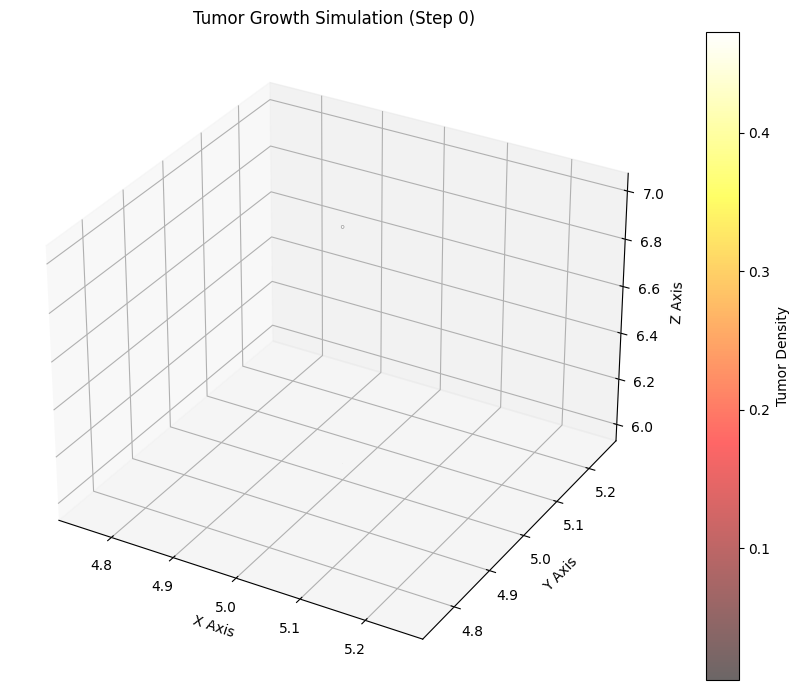

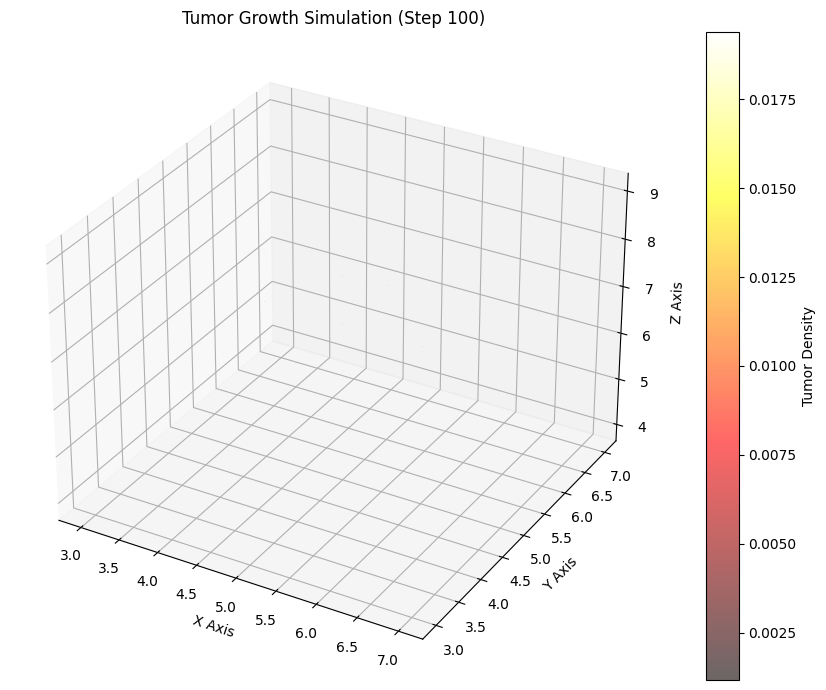

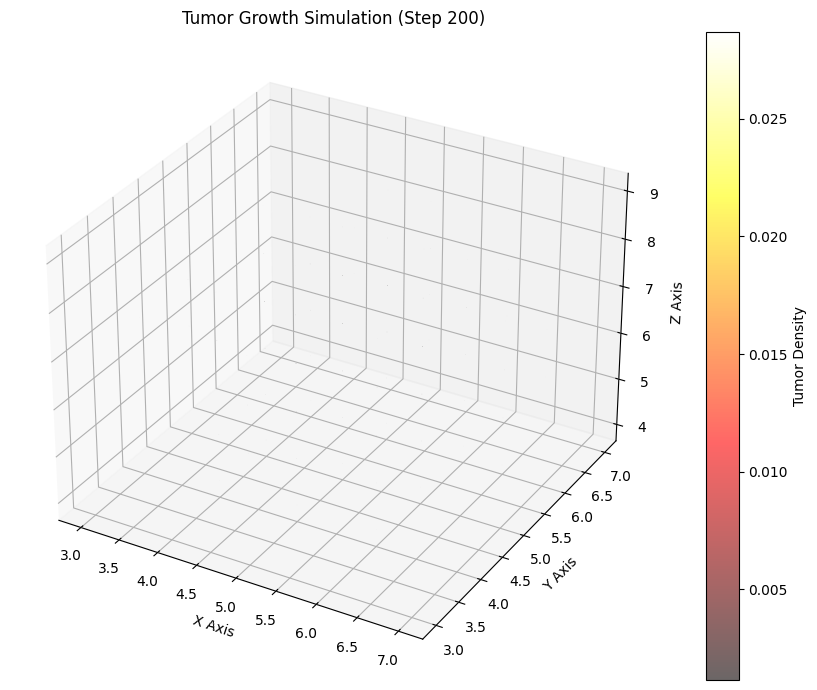

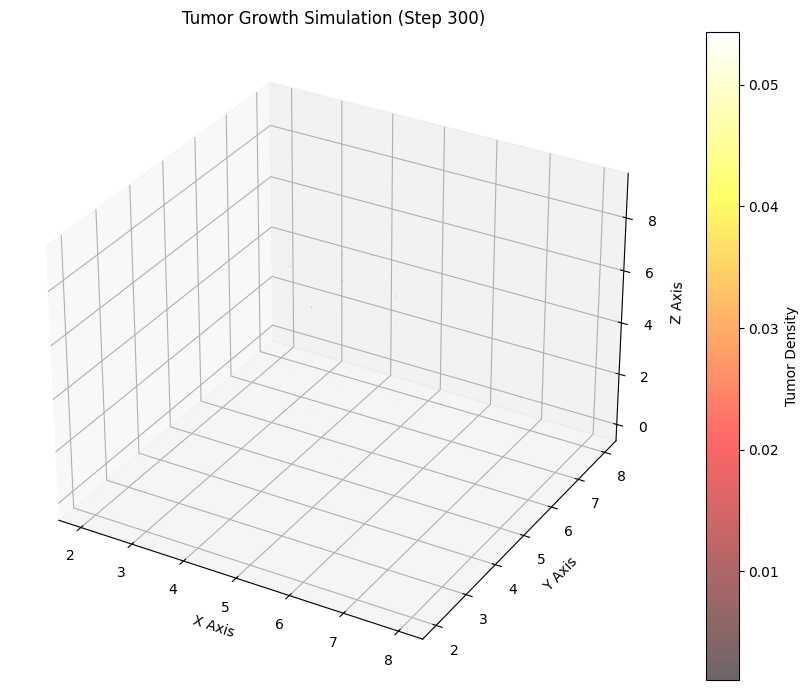

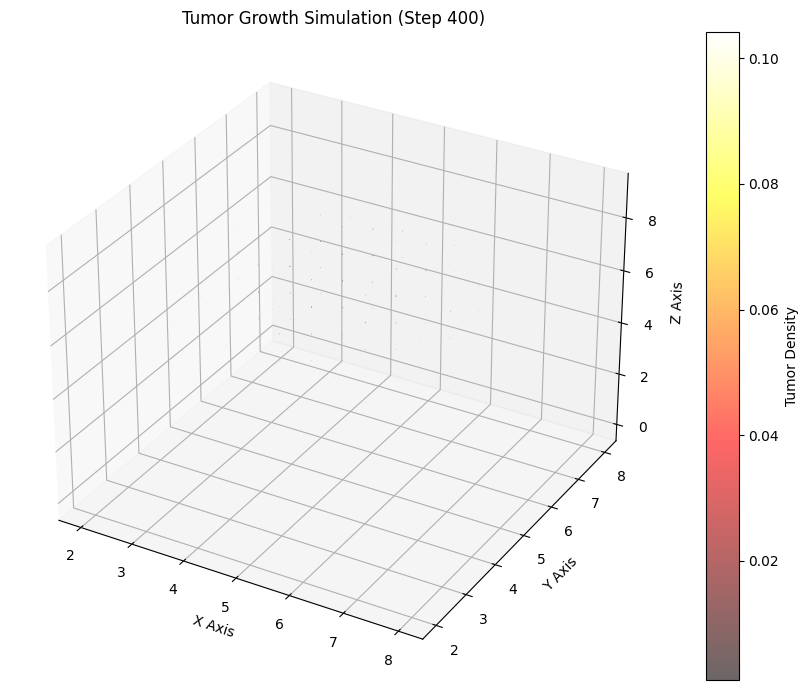

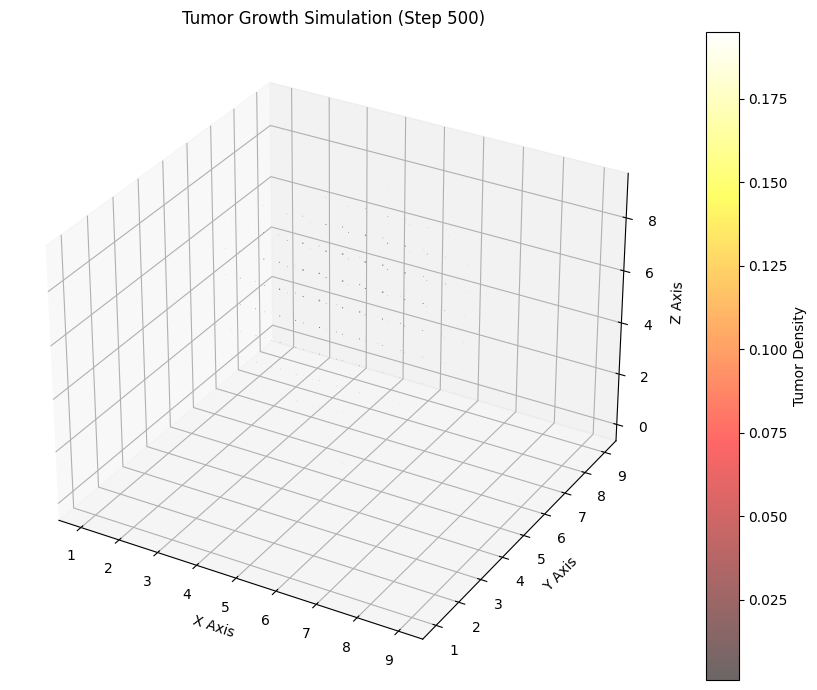

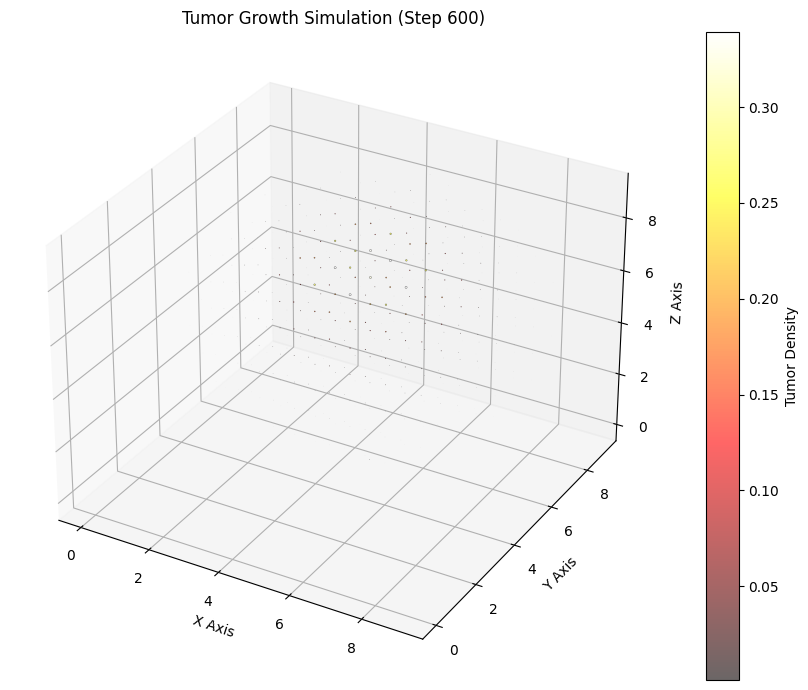

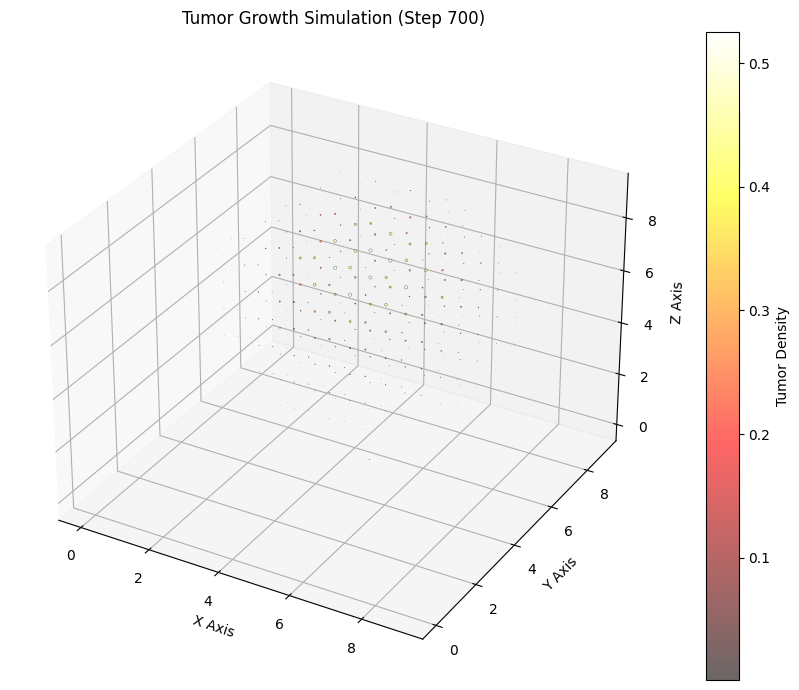

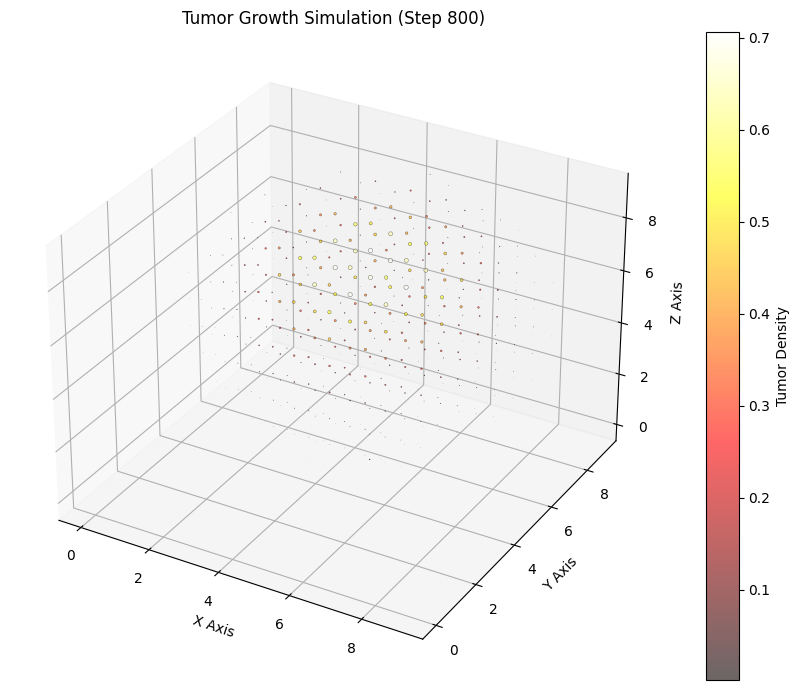

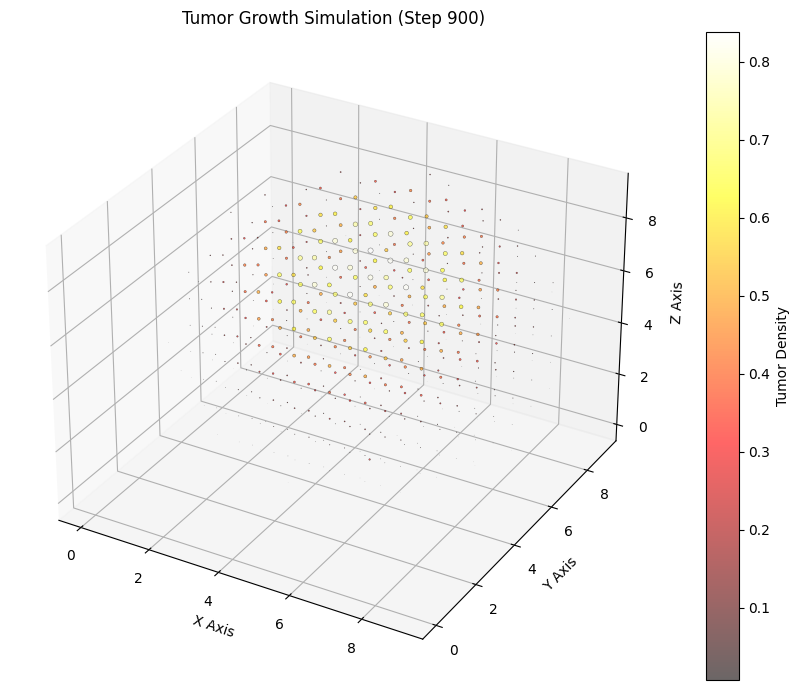

Generated 40 observations and 40 prediction points
Observation range: [0.006, 0.831]


In [ ]:
import TumorSimulator
import numpy as np
t,nx,ny,nz=10,10,10,10 
num_obs=40
num_pred=40
simulator =  TumorSimulator.TumorSimulation(
        nx=nx, ny=ny, nz=nz,
        D_w=0.1, 
        r=1.0,
        num_steps=1000
    )
    
simulator.run_simulation(visualize_interval=100)
simulator.generate_observations(num_obs=num_obs, num_pred=num_pred)

Using time step: 0.0100


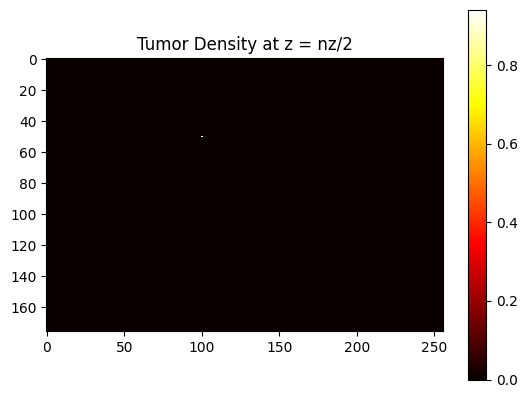

KeyboardInterrupt: 

In [ ]:
import nibabel as nib
import numpy as np
import TumorSimulator
file_path = 'C:/Users/1547726165/Desktop/Flanker/sub-08/anat/c1sub-08_T1w.nii' 
nii_image = nib.load(file_path)
D_w=1e-6
D_g=10*D_w
image_data = nii_image.get_fdata()  # 以 NumPy 数组的形式获取图像数据
D=D_g/(image_data+1e-5)+D_w/(1-image_data+1e-5)
nx,ny,nz=D.shape
t=10
simulator =  TumorSimulator.TumorSimulation(
        nx=nx, ny=ny, nz=nz,
        D_w=D_w, 
        r=1.0,
        num_steps=1000,
        flag=False
    )
simulator.D=D
simulator.run_simulation(visualize_interval=100)
simulator.generate_observations(num_obs=100, num_pred=100)

In [9]:
import numpy as np
import dill
import pickle
import torch
import Two_Stage_Method # 
#import matplotlib.pyplot as plt
#import pyswarms
import MAGI_PDE_Infer
import Generating_data # 
n_obs = 40
n_I = 40
lsteps=200
epsilon=1e-5
operator=0
source_term=0
size=[t,nx,ny,nz]
if(source_term==0):
    D=np.load('D.npy')
elif(source_term==1):
    D=image_data
PDEmodel=Generating_data.Generating_data(boundary_condition = False, pde_operator = operator, source_term = source_term, sigma_e=0.001, noisy_known = True, n_obs =n_obs, n_I = n_I,D=D,size=size)



loading
tensor([[0.0010]])
Standard diviation of data 0.2690443397165374
Optimizing GP parameter


c:\Users\1547726165\Desktop\PIGPI-main\GP_processing.py:274: OptimizeWarning: Unknown solver options: ftol
  res1 = minimize(self.Loss_mle,start_1, args=(train_x,train_y,sigma_e,kernel, n_obs), method='Nelder-Mead', bounds=bnds, options={'ftol': 1e-6,})
c:\Users\1547726165\Desktop\PIGPI-main\GP_processing.py:275: OptimizeWarning: Unknown solver options: ftol
  res2 = minimize(self.Loss_mle,start_2, args=(train_x,train_y,sigma_e,kernel, n_obs), method='Nelder-Mead', bounds=bnds, options={'ftol': 1e-6,})


Initial Optimization: [1.65852603e-05 2.02746826e+00 3.80222337e+00 4.22966465e+00
 3.53427776e+00]
tensor([[10.5753]], grad_fn=<AddBackward0>)
GP_var tensor(0.0603) Noise_var tensor(1.0000e-06) GP_parameter [2.02746826 3.80222337 4.22966465 3.53427776] Standardized [0.22527425 0.6337039  0.52870808 0.58904629]
Time for training GP: 2  secs


In [10]:
import MAGI_PDE_Infer
import Generating_data # 
magi= MAGI_PDE_Infer.MAGI_PDE_Infer(PDEmodel, KL=False) # call inference class
magi.cheat = 0
magi.Sample_Using_HMC(n_epoch = 5000, lsteps=lsteps, epsilon=epsilon, n_samples=20000, Normal_Approxi_Only = True)
magi.Sample_Using_HMC(n_epoch = 5000, lsteps=lsteps, epsilon=epsilon, n_samples=2000, Normal_Approxi_Only = False)

Optimizing GP parameter
Initial Optimization: [5.30345545e-05 2.52921683e+00 1.79024774e+00 2.23230832e+00
 8.12011712e-01]
tensor([[-4.2942]], grad_fn=<AddBackward0>)
GP_var tensor([[0.0187]]) Noise_var tensor([[1.8672e-08]]) GP_parameter [2.48698392 1.80628681 2.26978236 0.7549057 ] Standardized [0.27633155 0.3010478  0.2837228  0.12581762]
Time for training GP: 5  secs
start optimiza theta and u:
500 / 5000 current opt: theta: [0.03135103 0.05157241] error/out_scale tensor([1.6585e-05])
gradient 0.00044295553955061824 [0.00044312 0.00084813]
1000 / 5000 current opt: theta: [0.03135103 0.05157241] error/out_scale tensor([1.6585e-05])
gradient 0.00044295553955061824 [0.00044312 0.00084813]
1500 / 5000 current opt: theta: [0.03135103 0.05157241] error/out_scale tensor([1.6585e-05])
gradient 0.00044295553955061824 [0.00044312 0.00084813]
2000 / 5000 current opt: theta: [0.03135103 0.05157241] error/out_scale tensor([1.6585e-05])
gradient 0.00044295553955061824 [0.00044312 0.00084813]
25

KeyboardInterrupt: 

In [11]:
ts = Two_Stage_Method.Two_Stage_Method(PDEmodel) # call inference class
ts.minimize_msl()

Two-Stage method: [0.12268292 0.75474623] error tensor(0.1742)


{'theta_err': tensor(0.1742),
 'theta_err_relative': tensor(0.2362),
 'theta_ts': tensor([0.1227, 0.7547]),
 'u_dirivatives_ts': tensor([[ 6.9868e-01, -4.5258e-01,  2.3837e-01],
         [ 1.7388e-02, -2.1741e-02,  2.5249e-02],
         [ 4.0034e-01, -2.1988e-01,  2.7596e-01],
         [ 1.2364e-01, -1.6084e-01,  5.9769e-02],
         [ 4.9088e-01, -2.1045e-01,  1.0942e-01],
         [ 4.6804e-03,  5.9109e-02, -9.1950e-02],
         [ 6.1371e-01, -2.9658e-01,  8.5776e-02],
         [ 3.5935e-01, -5.3369e-02,  1.9479e-01],
         [ 2.7319e-01, -8.2052e-02,  9.9983e-02],
         [ 9.5434e-03,  2.8859e-02,  1.9901e-03],
         [ 1.2593e-02,  1.4036e-02,  4.7523e-02],
         [ 1.2642e-01, -7.7636e-02,  3.3443e-02],
         [ 1.2837e-01, -1.2103e-01,  1.6410e-01],
         [ 6.6700e-01, -2.6462e-01,  2.8623e-02],
         [ 3.6356e-02,  3.1226e-02,  1.5626e-01],
         [ 7.9919e-01, -2.6993e-01, -4.1896e-02],
         [ 6.4462e-01, -2.9697e-01,  2.2439e-01],
         [ 3.0304e-02,

In [5]:
from nipype.interfaces import spm

# 如果是通过 MATLAB 调用 SPM：
spm.SPMCommand.set_mlab_paths(
    matlab_cmd='F:\matlab\Bin\matlab.exe',  # MATLAB 可执行文件路径
    paths='F:\matlab\toolbox\spm12\spm12\spm.m' 
)
from nipype.interfaces.spm import Info
print(Info.version( matlab_cmd='F:\matlab\Bin\matlab.exe',
    paths='F:\matlab\toolbox\spm12\spm12' ))  # 应输出 SPM 版本（如 'SPM12'）

None


In [ ]:
import nibabel as nib
import numpy as np


file_path = 'C:/Users/1547726165/Desktop/Flanker/sub-08/anat/c1sub-08_T1w.nii' 
nii_image = nib.load(file_path)


image_data = nii_image.get_fdata()  # 以 NumPy 数组的形式获取图像数据
D=1e-5/(image_data+1e-5)+1e-6/(1-image_data+1e-5)

# 查看文件的基本信息
print("图像数据维度:", image_data.shape)
print("数据类型:", image_data.dtype)
print(image_data[50,100,:])



图像数据维度: (176, 256, 256)
数据类型: float64
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.5294118  0.97647065 0.98823535
 0.99607849 1.00000006 1.00000006 0.89019613 1.00000006 0.99607849
 0.96862751 0.97647065 0.99607849 1.00000006 0.19215687 0.8431373
 1.00000006 0.96078437 0.98823535 1.00000006 1.00000006 1.00000006
 0.99607849 0.98431378 0.67843141 0.3019608  0.90196084 0.98039221
 0.99215692 0.99607849 1.00000006 0.99607849 0.99607849 1.00000006
 1.00000006 0.91372554 0.00392157 0.00392157 0.00392157 0.
 0.         0.         0.     

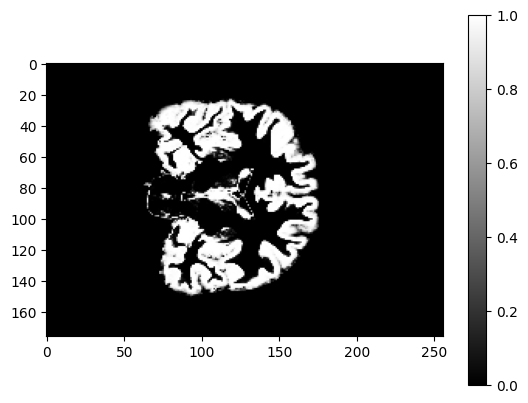

In [2]:
import matplotlib.pyplot as plt
mid_slice = image_data.shape[1] // 2 
# 可视化第一个切片
plt.imshow(image_data[:, mid_slice , : ], cmap='gray')  
plt.colorbar()
plt.show()


0.01


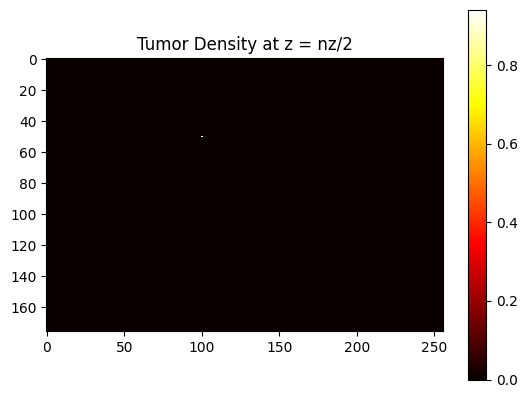

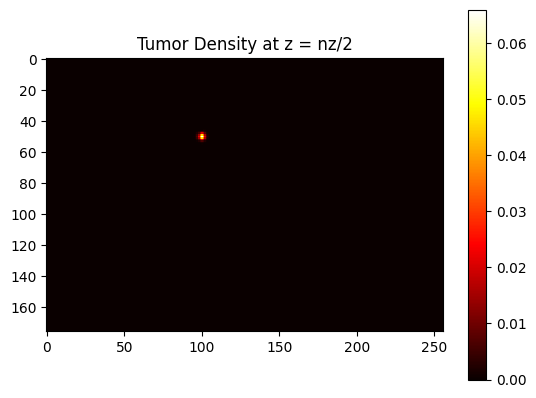

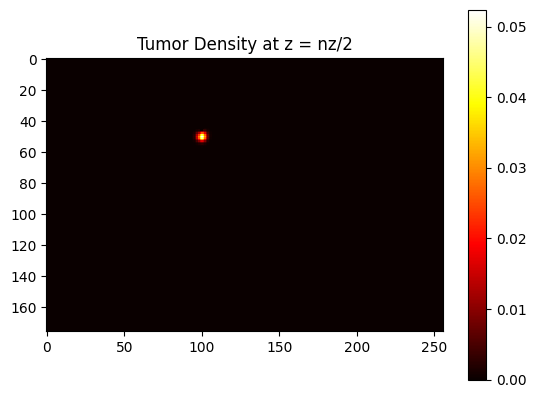

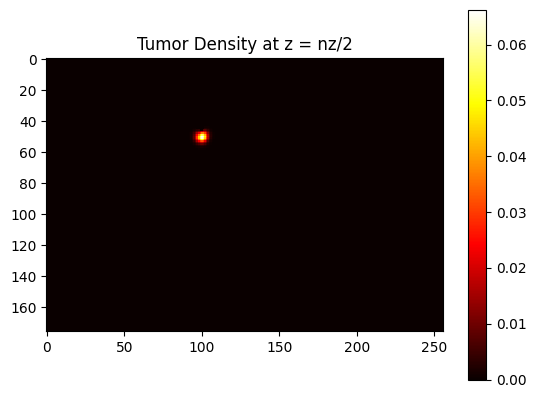

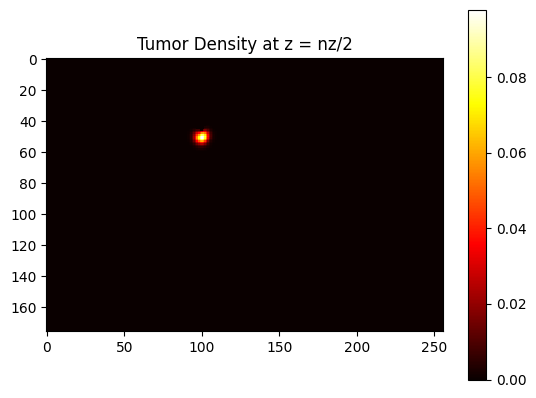

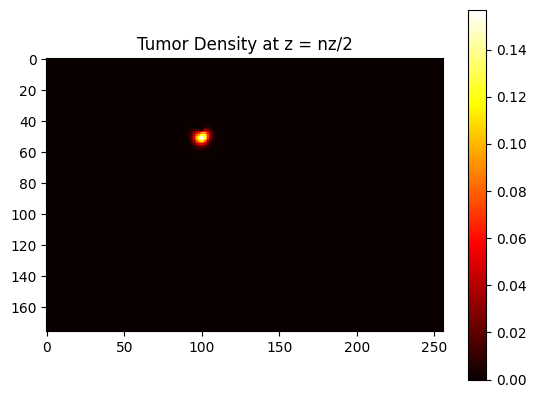

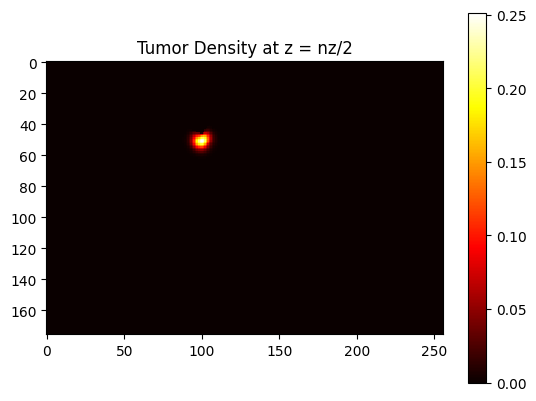

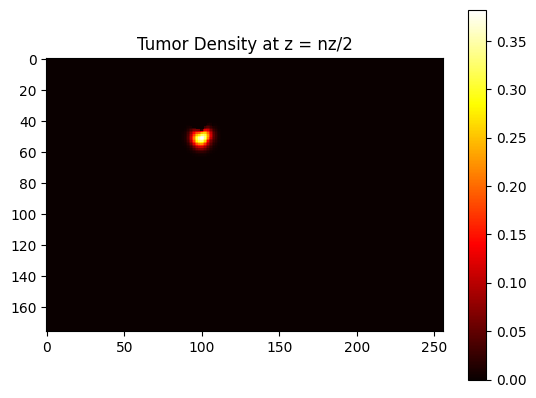

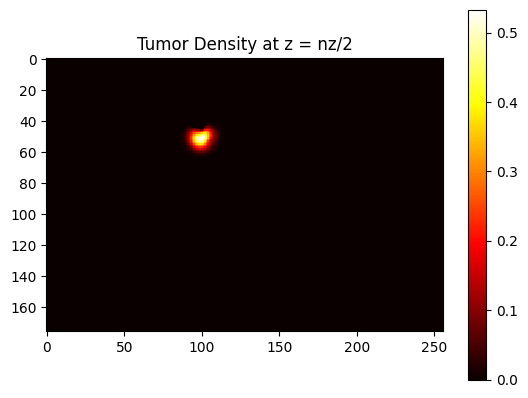

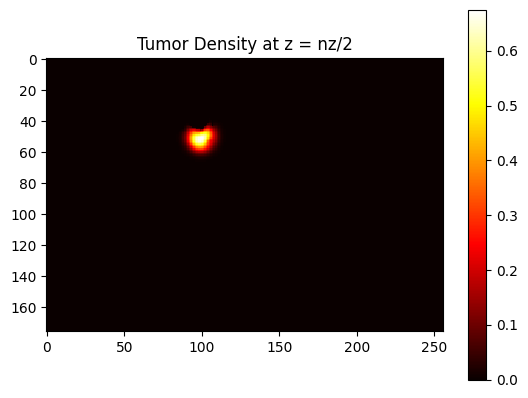

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 参数设置
nx, ny, nz = D.shape  # 假设D是一个形状为(nx, ny, nz)的3D数组
dx, dy, dz = 1.0, 1.0, 1.0  # 空间步长
dt = 0.01  # 时间步长
r = 1.0  # 生长率
num_steps = 1000  # 时间步数

# 初始化扩散系数 D 和肿瘤密度 u
u = np.zeros((nx, ny, nz))  # 初始肿瘤密度
u[50, 100, nz//2] = 1.0  # 在中心点设置初始肿瘤密度
# 自动计算时间步长
D_max = np.max(D)
dt_max = 0.5 * dx**2 / (6 * D_max)
dt = min(0.01, dt_max)  # 取更严格的时间步长

print(dt)
# 时间迭代
for step in range(num_steps):
    u_new = u.copy()
    
    # 计算拉普拉斯算子
    laplacian = (np.roll(u, -1, axis=0) - 2*u + np.roll(u, 1, axis=0)) / dx**2 + \
                (np.roll(u, -1, axis=1) - 2*u + np.roll(u, 1, axis=1)) / dy**2 + \
                (np.roll(u, -1, axis=2) - 2*u + np.roll(u, 1, axis=2)) / dz**2
    
    # 更新肿瘤密度
    u_new = u + dt * (D * laplacian + r * u * (1 - u))
    
    # 边界条件（假设边界处肿瘤密度为0）
    u_new[0, :, :] = u_new[-1, :, :] = 0
    u_new[:, 0, :] = u_new[:, -1, :] = 0
    u_new[:, :, 0] = u_new[:, :, -1] = 0
    
    u = u_new
    u = np.clip(u_new, 0, 1)
    if step % 100 == 0:
        # 可视化结果 
        plt.imshow(u[:, :, nz//2], cmap='hot', interpolation='nearest')
        plt.colorbar()
        plt.title("Tumor Density at z = nz/2")
        plt.show()


0.7593156224309029


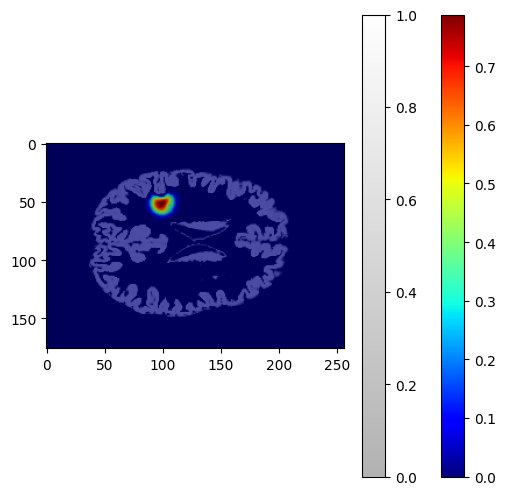

"\nu=np.load('output.npy')\nprint(u[:,ny//2,nz//2])\n3dslicer\n"

In [5]:
print(u[50, 100, nz//2] )
plt.figure(figsize=(6, 6))

# 显示第一个图像
plt.imshow(u[:, :, nz//2], cmap='jet', alpha=1.0)  # 设置透明度为0.5
plt.colorbar()

# 显示第二个图像
plt.imshow(image_data[:,:, nz//2], cmap='gray', alpha=0.3)  
plt.colorbar()

# 显示图像
plt.show()
np.save('output.npy',u)
'''
u=np.load('output.npy')
print(u[:,ny//2,nz//2])
3dslicer
'''

In [4]:
data=np.load('output.npy')
#创建一个 NIfTI图像对象 
# #注意：需要确保 .npy数据的形状和方向与原始 NIfTI文件一致 
nii_img = nib.Nifti1Image(data, affine=np.diag([-1,1, -1,1])) 
# affine是仿射矩阵，需要与实际数据对齐 
# #保存为 NIfTI文件 
nib.save(nii_img, 'output.nii')


0.01


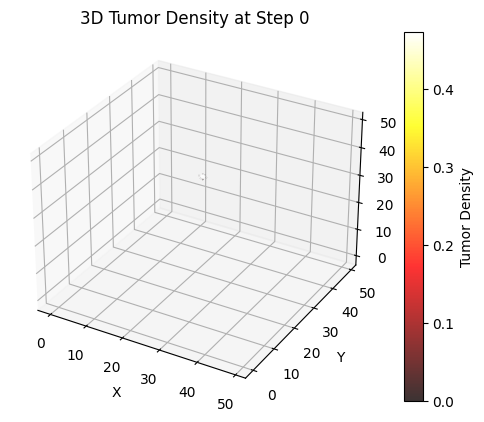

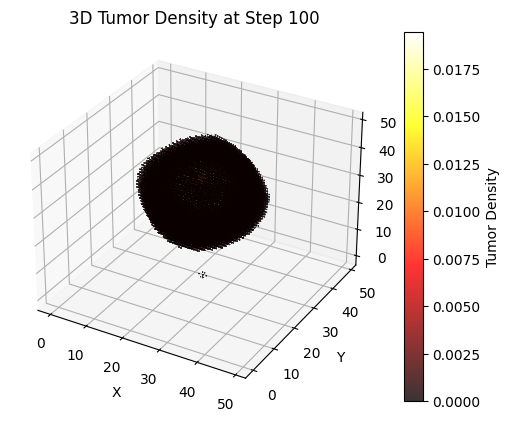

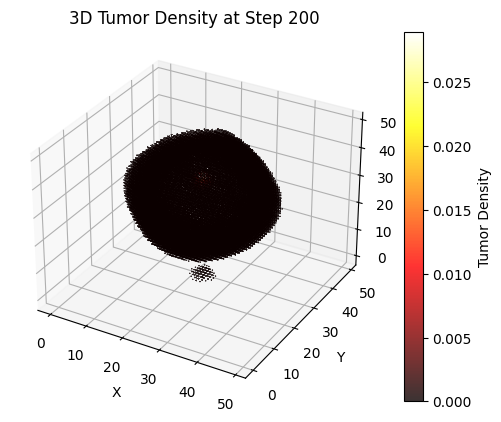

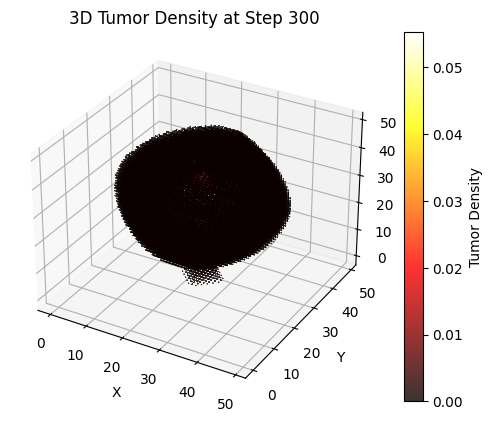

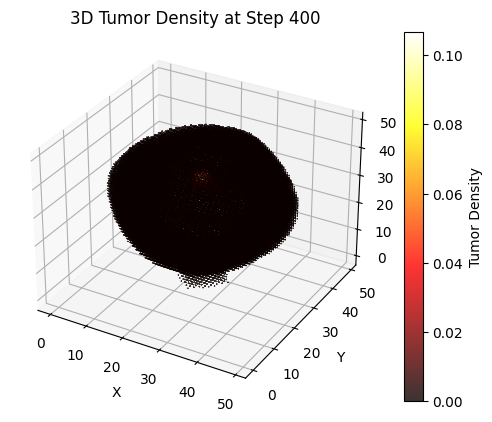

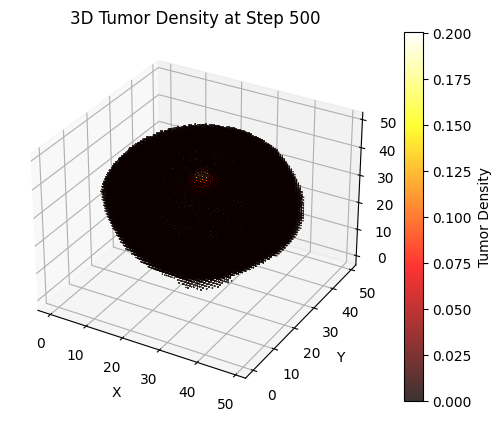

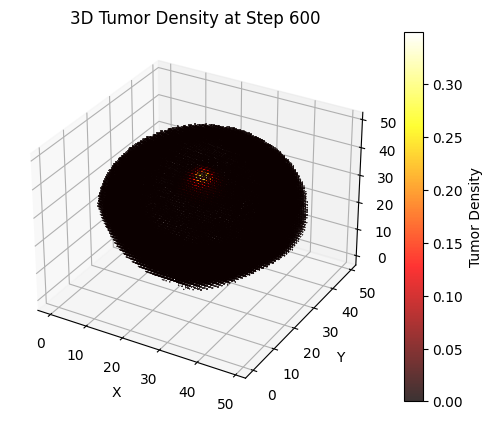

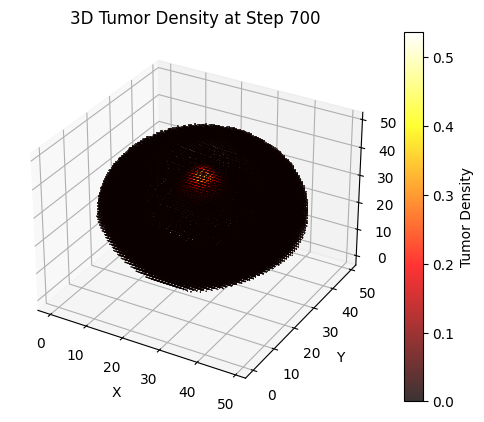

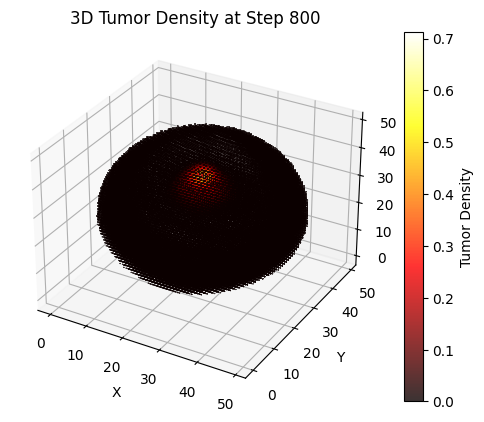

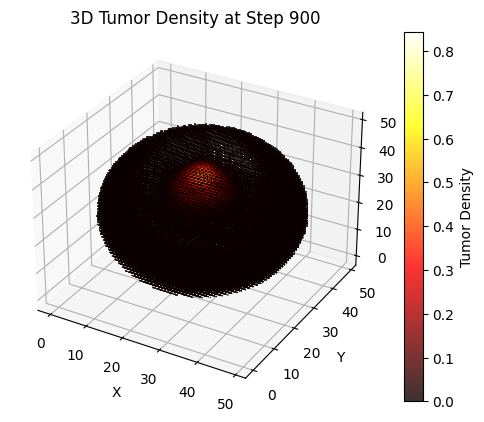

x_obs shape: (100, 4)
y_obs shape: (100,)
x_pred shape: (100, 4)
y_pred shape: (100,)
0.907831221739692


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.io import savemat

# 参数设置
nx, ny, nz = 50, 50,50
dx, dy, dz = 1.0, 1.0, 1.0  # 空间步长
dt = 0.01  # 时间步长
r = 1.0  # 生长率
D_w = 0.1
D_g = 10*D_w
num_steps = 1000  # 时间步数

# 初始化扩散系数 D 和肿瘤密度 u
D = np.zeros((nx, ny, nz), dtype=np.double)  # 扩散系数
u = np.zeros((nx, ny, nz))  # 初始肿瘤密度

# 定义球体的半径
R1 = min(nx, ny, nz) // 2  # 外部球体半径
R2 = R1 // 2  # 内部球体半径

# 计算球体的中心
center = np.array([nx//2, ny//2, nz//2])

# 设置 D 的值
D_binary = np.zeros_like(D)
for i in range(nx):
    for j in range(ny):
        for k in range(nz):
            distance = np.sqrt((i - center[0])**2 + (j - center[1])**2 + (k - center[2])**2)
            if distance <= R2:
                D[i, j, k] = D_g  # 内部球体
                D_binary[i, j, k] = 1  # 内部球体
            elif distance <= R1:
                D[i, j, k] = D_w  # 外部球体



np.save('D.npy', D_binary)
# 在分界处设置一个点的初始肿瘤密度

z_point = min(nz//2 + R2, nz - 1)  
u[nx//2, ny//2, z_point] =0.5



# 自动计算时间步长
D_max = np.max(D)
dt_max = 0.5 * dx**2 / (6 * D_max)
dt = min(0.01, dt_max)  
print(dt)

# 初始化存储数据的列表
x_inter_list = []
y_inter_list = []

# 时间迭代
for step in range(num_steps):
    u_new = u.copy()
    
    # 计算拉普拉斯算子
    laplacian = (np.roll(u, -1, axis=0) - 2*u + np.roll(u, 1, axis=0)) / dx**2 + \
                (np.roll(u, -1, axis=1) - 2*u + np.roll(u, 1, axis=1)) / dy**2 + \
                (np.roll(u, -1, axis=2) - 2*u + np.roll(u, 1, axis=2)) / dz**2
    
    # 更新肿瘤密度
    u_new = u + dt * (D * laplacian + r * u * (1 - u))

    # 边界条件：球体外的位置肿瘤密度为0
    for i in range(nx):
        for j in range(ny):
            for k in range(nz):
                distance = np.sqrt((i - center[0])**2 + (j - center[1])**2 + (k - center[2])**2)
                if distance > R1:
                    u_new[i, j, k] = 0

    u = u_new
    u = np.clip(u_new, 0, 1)
    
    if step % 100 == 0:
        # 创建三维图
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
       
        x, y, z = np.where(u >= 0)
        values = u[x, y, z]
        
        # 绘制三维散点图
        scatter = ax.scatter(x, y, z, c=values, cmap='hot', s=10 * values, alpha=0.8)
        

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        
        # 添加颜色条
        plt.colorbar(scatter, ax=ax, label='Tumor Density')
        
        # 设置标题
        ax.set_title(f"3D Tumor Density at Step {step}")
        #np.save(f'u_{step*dt}.npy',u)
        plt.show()
        
        # 保存数据到列表
        current_time = step * dt
        x_inter_list.append(np.column_stack((np.full(len(x), current_time), x, y, z)))
        y_inter_list.append(values)

# 将列表转换为数组
x_inter = np.vstack(x_inter_list)
y_inter = np.hstack(y_inter_list)
# 计算肿瘤密度的权重
weights = y_inter / np.sum(y_inter)

# 根据权重进行采样
sampled_indices = np.random.choice(len(x_inter), size=100, p=weights)
x_obs = x_inter[sampled_indices]
y_obs = y_inter[sampled_indices]



num_pred = 100 

# 排除 obs_indices 所对应的索引
remaining_indices = np.setdiff1d(np.arange(len(x_inter)), sampled_indices)

# 从剩余的索引中随机选择预测点
pred_indices = np.random.choice(remaining_indices, num_pred, replace=False)

# 获取预测点的坐标和对应的肿瘤密度值
x_pred = x_inter[pred_indices]  # 预测点的坐标 (时间, x, y, z)
y_pred = y_inter[pred_indices]  # 预测点的肿瘤密度值

sigma_e = 1e-3
theta_true = [D_w,r]
# 保存为.mat文件
savemat('tumor_data.mat', {
    'sigma_e': sigma_e,
    'theta_true': theta_true,
    'x_inter': x_inter, 
    'y_inter': y_inter, 
    'x_obs': x_obs, 
    'y_obs': y_obs, 
    'x_pred': x_pred, 
    'y_pred': y_pred
})

print("x_obs shape:", x_obs.shape)
print("y_obs shape:", y_obs.shape)
print("x_pred shape:", x_pred.shape)
print("y_pred shape:", y_pred.shape)


print(u[nx//2, ny//2, z_point])

